In [1]:
# 引入Python包，在jupyter notebook 运行后可以直接输出多个变量 注意大小写
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 指定gpu设备
import os
os.environ['CUDA_VISIBLE_DEVICES'] ="0" # gpu
# os.environ["CUDA_VISIBLE_DEVICES"] = "-1" # cpu

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# 单步调试，查看各步结果
X = np.array([[-1, 1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
X.shape
samples, features = X.shape
samples, features

k = features - 1

# 求均值
mean = np.array([np.mean(X[:,i]) for i in range(features)])
mean
# 数据中心化
norm_X = X - mean
norm_X

# 计算协方差矩阵
# 中心化之后的协方差矩阵，除不除 sample，对最终的特征值没有影响，为什么？
scatter_matrix = np.dot(np.transpose(norm_X), norm_X)  / samples
scatter_matrix
# 求特征矩阵和特征值
eig_val, eig_vec = np.linalg.eig(scatter_matrix)
eig_val, eig_vec

eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(features)]
eig_pairs
eig_pairs.sort(reverse=True)
feature = np.array([ele[1] for ele in eig_pairs[:k]])
feature
data = np.dot(norm_X,np.transpose(feature))
data

(6, 2)

(6, 2)

array([0.        , 0.33333333])

array([[-1.        ,  0.66666667],
       [-2.        , -1.33333333],
       [-3.        , -2.33333333],
       [ 1.        ,  0.66666667],
       [ 2.        ,  0.66666667],
       [ 3.        ,  1.66666667]])

array([[4.66666667, 2.66666667],
       [2.66666667, 1.88888889]])

(array([6.28445758, 0.27109797]),
 array([[ 0.8549662 , -0.51868371],
        [ 0.51868371,  0.8549662 ]]))

[(6.284457583941069, array([0.8549662 , 0.51868371])),
 (0.27109797161448745, array([-0.51868371,  0.8549662 ]))]

array([[0.8549662 , 0.51868371]])

array([[-0.50917706],
       [-2.40151069],
       [-3.7751606 ],
       [ 1.20075534],
       [ 2.05572155],
       [ 3.42937146]])

In [3]:
# 封装成 接口
def my_pca(X, k):
    assert(k > 0)
    samples, features = X.shape

    # 求均值
    mean = np.array([np.mean(X[:,i]) for i in range(features)])
    # 数据中心化
    norm_X = X - mean

    # 计算协方差矩阵
    # 中心化之后的协方差矩阵，除不除 sample，对最终的特征值没有影响，为什么？
    scatter_matrix = np.dot(np.transpose(norm_X), norm_X)  / samples
    # 求特征矩阵和特征值
    eig_val, eig_vec = np.linalg.eig(scatter_matrix)
    eig_pairs = [(np.abs(eig_val[i]), eig_vec[:,i]) for i in range(features)]
    feature = np.array([ele[1] for ele in eig_pairs[:k]])
    data = np.dot(norm_X,np.transpose(feature))
    return data

In [4]:
X = np.array([[-1, 1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
my_pca(X, 1)
X = np.array([[10, 15, 29],
                  [15, 46, 13],
                  [23, 21, 30],
                  [11, 9,  35],
                  [42, 45, 11],
                  [9,  48, 5],
                  [11, 21, 14],
                  [8,  5,  15],
                  [11, 12, 21],
                  [21, 20, 25]])
my_pca(X, 2)

array([[-0.50917706],
       [-2.40151069],
       [-3.7751606 ],
       [ 1.20075534],
       [ 2.05572155],
       [ 3.42937146]])

array([[ 13.46265879,   0.14716812],
       [-21.26163019,   6.12047583],
       [  4.72218421, -11.17511862],
       [ 20.73656976,  -4.11279645],
       [-29.35392285, -16.6403498 ],
       [-24.34524952,  15.35505662],
       [  2.02368689,   6.94159433],
       [ 17.20180383,   7.68072922],
       [ 12.59724119,   2.8162366 ],
       [  4.2166579 ,  -7.13299586]])

In [5]:
# conda install scikit-learn
# sklean 方法
from sklearn.decomposition import PCA
X = np.array([[-1, 1], [-2, -1], [-3, -2], [1, 1], [2, 1], [3, 2]])
pca = PCA(n_components=2)
newX = pca.fit_transform(X)
newX
# 可以看到第一维能表达95%的数据，如果只用1维表达原数据，那就说明有会5%的信息损失
pca.explained_variance_ratio_

array([[ 0.50917706,  1.08866118],
       [ 2.40151069, -0.10258752],
       [ 3.7751606 , -0.43887001],
       [-1.20075534,  0.05129376],
       [-2.05572155, -0.46738995],
       [-3.42937146, -0.13110746]])

array([0.95864607, 0.04135393])

In [6]:
X = np.array([[10, 15, 29],
                  [15, 46, 13],
                  [23, 21, 30],
                  [11, 9,  35],
                  [42, 45, 11],
                  [9,  48, 5],
                  [11, 21, 14],
                  [8,  5,  15],
                  [11, 12, 21],
                  [21, 20, 25]])
pca = PCA(n_components=3)
newX = pca.fit_transform(X)
newX
pca.explained_variance_ratio_

array([[-13.46265879,  -0.14716812,  -5.02246553],
       [ 21.26163019,  -6.12047583,  -5.75958828],
       [ -4.72218421,  11.17511862,  -3.83506194],
       [-20.73656976,   4.11279645,  -6.41635255],
       [ 29.35392285,  16.6403498 ,   6.50660983],
       [ 24.34524952, -15.35505662,  -2.72416256],
       [ -2.02368689,  -6.94159433,   4.19630307],
       [-17.20180383,  -7.68072922,  10.11900902],
       [-12.59724119,  -2.8162366 ,   3.10939317],
       [ -4.2166579 ,   7.13299586,  -0.17368423]])

array([0.723691  , 0.20583705, 0.07047195])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


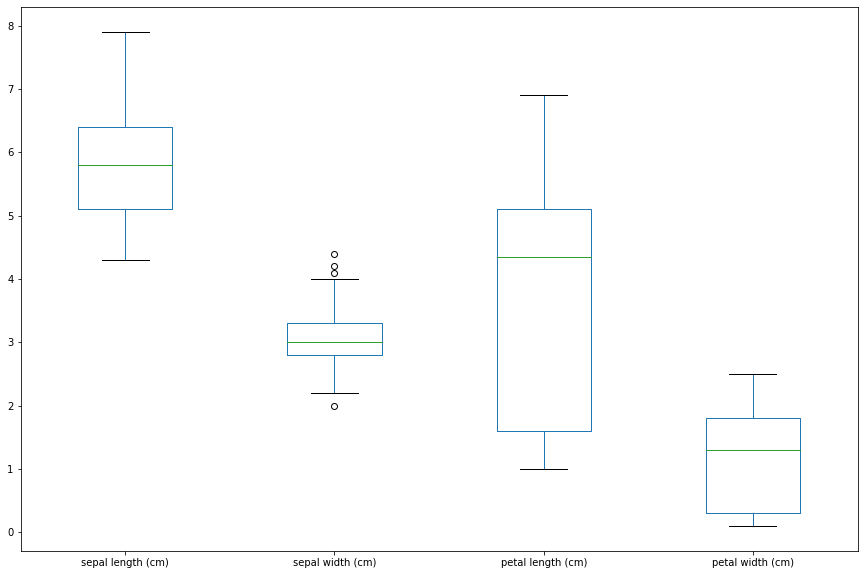

In [7]:
# 鸢尾花数据集
from sklearn import datasets
import pandas as pd

iris = datasets.load_iris()
irisFeatures = iris["data"]
irisFeaturesName = iris["feature_names"]
irisLabels = iris["target"]

dataset = pd.DataFrame(irisFeatures, columns=['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)'])
dataset.describe()
# 箱线图：boxplot所绘制的就是箱线图, 它能显示出一组数据的最大值, 最小值, 四分位数以及异常点
dataset.plot.box(figsize=(15, 10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D3149E1A88>,
      dtype=object)

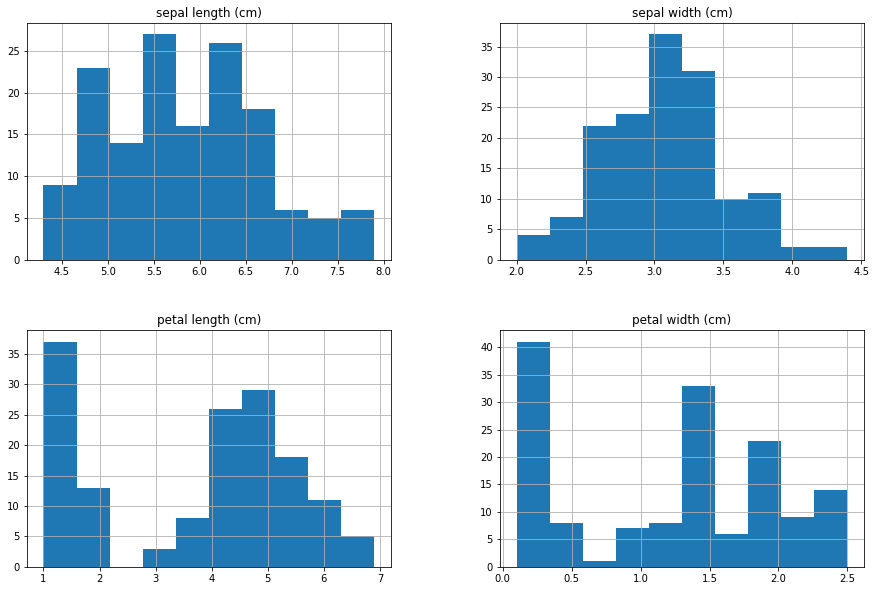

In [8]:
s = dataset.hist(figsize=(15, 10))  # 数据直方图histograms
s

In [9]:
# 鸢尾花数据集降维
iris = datasets.load_iris()
type(iris)
iris.keys()
type(iris['data'])
iris['data'].shape
# iris['data']
# iris['target']
# iris['target_names']

X = iris['data']
pca = PCA(n_components=4)
newX = pca.fit_transform(X)
# newX
pca.explained_variance_ratio_

sklearn.utils.Bunch

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

numpy.ndarray

(150, 4)

array([0.92461872, 0.05306648, 0.01710261, 0.00521218])